<a href="https://colab.research.google.com/github/ZenoZoldyck/hand_on_tensorflow/blob/main/Ideal_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer

tf.__version__

'2.5.0'

In [2]:
# using the same data set
from sklearn.datasets import make_circles
n = 1000
X, y = make_circles(n, noise = 0.03, random_state = 42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test), X_train.dtype

(1000, 800, 200, dtype('float64'))

In [5]:
# create a model with a learning rate callback

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")                         
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))
history = model.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.5063
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5088
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5113
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5125
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5175
Epoch 11/

In [6]:
# look at the history
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.698411,0.50625,0.000100
1,0.698173,0.50250,0.000112
2,0.697907,0.50875,0.000126
3,0.697636,0.51000,0.000141
4,0.697348,0.50875,0.000158
...,...,...,...
95,0.879655,0.48000,5.623413
96,0.815147,0.51750,6.309574
97,0.831595,0.51250,7.079458
98,0.832721,0.51250,7.943282


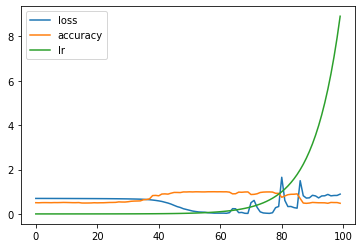

In [7]:
# time to visualize

pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'learning rate vs loss curve')

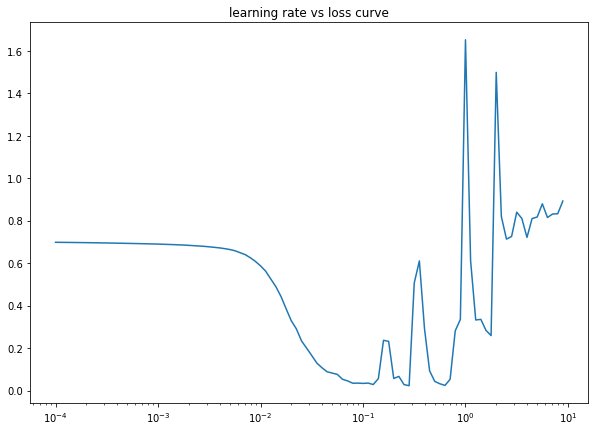

In [9]:
# plotting loss vs learning rate

lr = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lr, history.history["loss"])
plt.title("learning rate vs loss curve")

In [11]:
# choose a learning rate where the loss is still decreasing and has not completely flattened out.
# generally used learning rates are
10**-1, 10**-2, 10**-3

(0.1, 0.01, 0.001)

In [13]:
# running model with best found leraning rate

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")                         
])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.02),
              metrics = ["accuracy"])

history = model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
loss, accuracy = model_1.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9950


(0.024818703532218933, 0.9950000047683716)

In [18]:
# confusion matrix for evaluating our model

from sklearn.metrics import confusion_matrix
y_pred = model_1.predict(X_test)
y_pred = tf.round(y_pred)
confusion_matrix(y_test, y_pred)

array([[ 99,   1],
       [  0, 100]])